In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import pandas as pd
#from usefulFunctions import all
def makeArange(yaxis,start = 0,step = 1, dtype = None):
    return arange(0,size(yaxis))


Populating the interactive namespace from numpy and matplotlib


In [2]:
IncomingPower = genfromtxt('C:\Users\Brendan\Documents\MATLAB\incomingPower.csv', delimiter=',')
modePower = pd.read_csv('C:\Users\Brendan\OneDrive\Documents\ModePowers.csv')
modes = {0:'1a',1:'1b',2:'1c',3:'2a',4:'2b',5:'2c',6:'2d',7:'2e',8:'3a',9:'3b',10:'4a',11:'4b'}
modes_str = {v: k for k, v in modes.items()}


1.371
1.52945577846 Wh per orbit when idle
0.653827337855 orbits per Wh charged


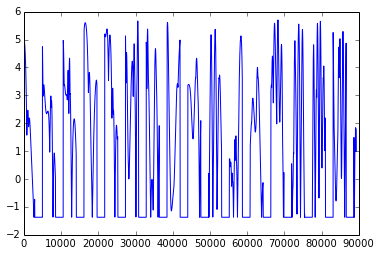

In [3]:
averageIncomingPower = average(IncomingPower)
#plot(makeArange(IncomingPower)[0:5400], IncomingPower[0:5400])
#print shape(IncomingPower)[0]
a = zeros(shape(IncomingPower)[0])
for x in makeArange(IncomingPower):
    if(IncomingPower[x] == 0):
        a[x] = 1
eclipseEndTimes = []
for x in makeArange(IncomingPower)[5:-5]:
    eclipseEnd = False
    flagWrong = False
    for y in arange(0,5):
        if IncomingPower[x-y] != 0:
            flagWrong = True
            break
    
    if flagWrong:
        continue
    else:
        flagWrong = False;
        if IncomingPower[x+1] != 0:
            eclipseEndTimes.append(x)

orbitTimes = zeros(size(eclipseEndTimes)-1)
#print eclipseEndTimes
for x in arange(0,size(eclipseEndTimes))[1:]:
    orbitTimes[x-1] = eclipseEndTimes[x]-eclipseEndTimes[x-1]

#print orbitTimes
orbitTimeAverage = average(orbitTimes) #+/- 1 second over this day
#figure()
#print 89289/orbitTimeAverage#15.997 orbits. Close enough.
EnergyPerOrbit = 0
netIncoming = []
idlePower = sum(modePower['2a'])
print idlePower
for x in IncomingPower:
    netIncoming.append(x - idlePower) #this assumes one-second timesteps
#print sum(netIncoming)
plot(arange(0,size(netIncoming)),netIncoming)
EnergyPerOrbit = sum(netIncoming)/(shape(IncomingPower)[0]/orbitTimeAverage)

EPOWh = EnergyPerOrbit/3600 #in Wh
orbitsPerWh = 1/EPOWh
#print "Energy Per Orbit: " + str(EnergyPerOrbit) + "(Ws)"
print str(EPOWh) + " Wh per orbit when idle"
#orbitsPerWh=1/((EnergyPerOrbit/3600)/(orbitTimeAverage/3600))
#print orbitTimeAverage
print str(orbitsPerWh) + " orbits per Wh charged"

In [6]:
def plotTimes(mode,orbitsPerWh,orbitTime, timeLower = 0, timeUpper = 60):
    figure(figsize = (12, 5))
    ax1 = subplot()
    power = sum(modePower[mode])-sum(modePower['2a'])
    powerPlot = arange(timeLower, timeUpper)
    powerPlot = powerPlot*power*orbitsPerWh/orbitTime
    times = arange(timeLower, timeUpper)
    #plot(times, powerPlot, 'r-', label = r'Mode %s'% mode)
    lns1 = ax1.plot(times, powerPlot, 'r-.', label = r'# of Orbits')
    #ax1.legend(loc = 'best')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(times, powerPlot*orbitTime/3600,'b--',label = 'Time to Recover')
    ax1.set_xlabel(r'Time Spent in Mode %s (s)'%mode,)# fontsize = 20)
    ax1.set_ylabel('# of Orbits of Charge Spent (Orbits)')#, fontsize = 20)
    ax2.set_ylabel('Recovery Time (Hours)')
    #ax1.set_ylim(0)
    #ax2.set_ylim(0)
    title(r'Number of Orbits to Recover From Time Spent in Mode %s'%mode, fontsize = 20)
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns,labs,loc = 'best')
    #ax2.legend(loc = 'best')
    savefig(r'%s'%mode+'.png')
def plotTimesPower(power,orbitsPerWh,orbitTime, timeLower = 0, timeUpper = 60):
    figure(figsize = (12,8))
    totPower = power
    power = power-sum(modePower['2a'])
    powerPlot = arange(timeLower, timeUpper)
    powerPlot = powerPlot*power*orbitsPerWh
    times = arange(timeLower, timeUpper)
    
    
    xlabel(r'Time Spent at %f Watts (s)'%totPower, fontsize = 20)
    ylabel('# of Orbits of Charge Spent (Wh)', fontsize = 20)
    title(r"Number of Orbits to Recover From Time Spent at %f Watts"%totPower, fontsize = 30)
    legend(loc = 'best')
def rechargeTime(mode, orbitsPerWh,orbitTime, time):
    power = sum(modePower[mode])
    print str(time*power/3600) + "Wh Used"
    print str(time*power*orbitsPerWh/orbitTime) + "Orbits to Recover"
def rechargeTimePower(power, orbitsPerWh,orbitTime, time):
    print str(time*power/3600) + "Wh Used"
    print str(time*power*orbitsPerWh/orbitTime) + "Orbits to Recover"

0.190416666667Wh Used
0.08030027115Orbits to Recover
0.625138888889Wh Used
0.26362620018Orbits to Recover
0.39875Wh Used
0.168156147682Orbits to Recover
0.190416666667Wh Used
0.08030027115Orbits to Recover
0.833472222222Wh Used
0.351482076711Orbits to Recover
0.190416666667Wh Used
0.08030027115Orbits to Recover
0.190416666667Wh Used
0.08030027115Orbits to Recover
0.166944444444Wh Used
0.0704018423941Orbits to Recover
0.495972222222Wh Used
0.20915555673Orbits to Recover
0.954305555556Wh Used
0.4024384851Orbits to Recover
1.09305555556Wh Used
0.46095049887Orbits to Recover
0.884722222222Wh Used
0.373094622338Orbits to Recover


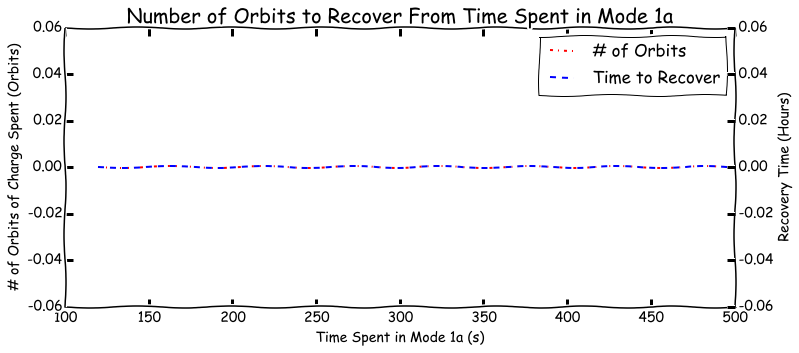

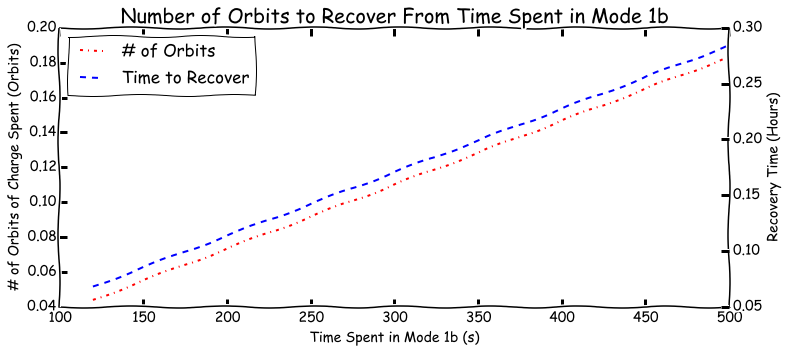

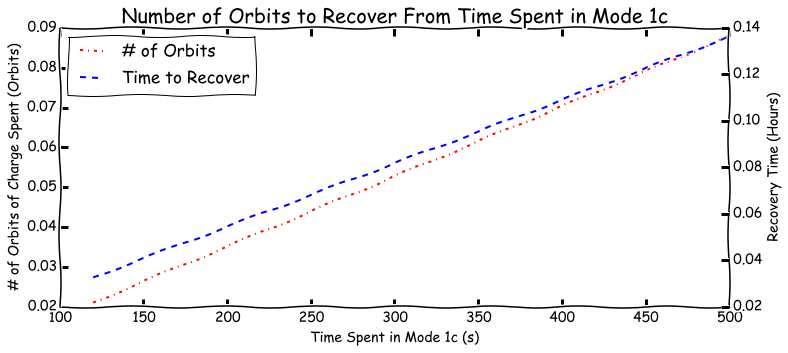

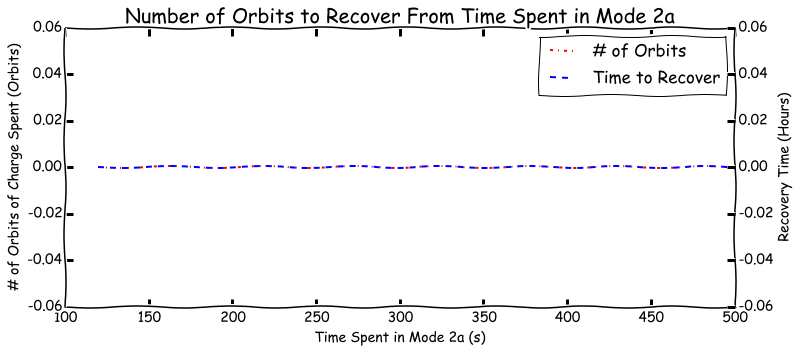

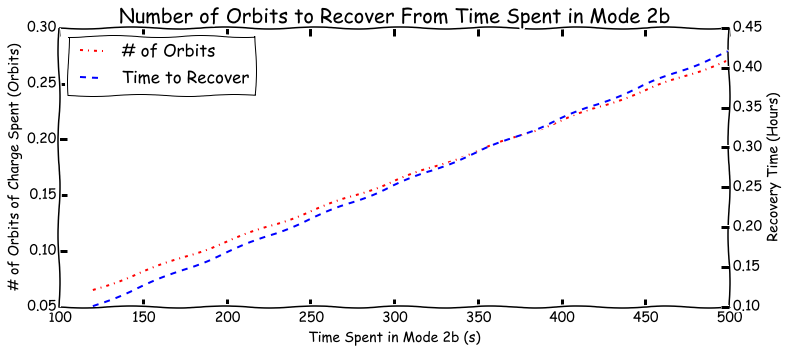

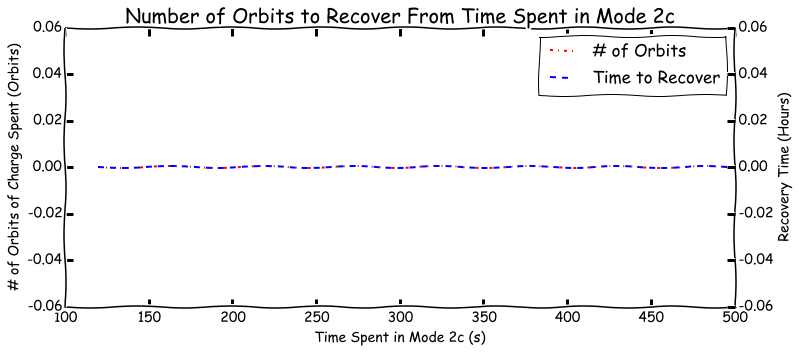

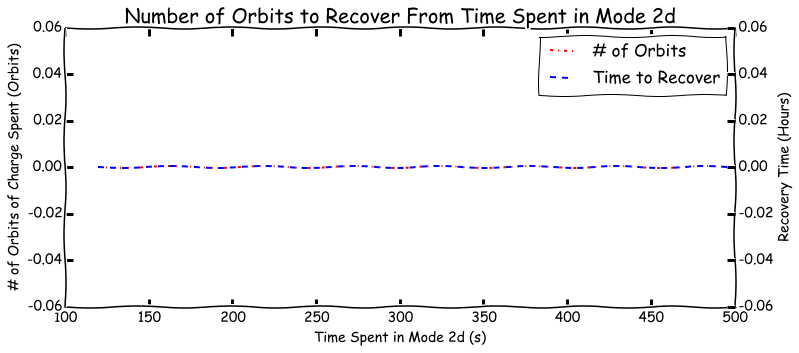

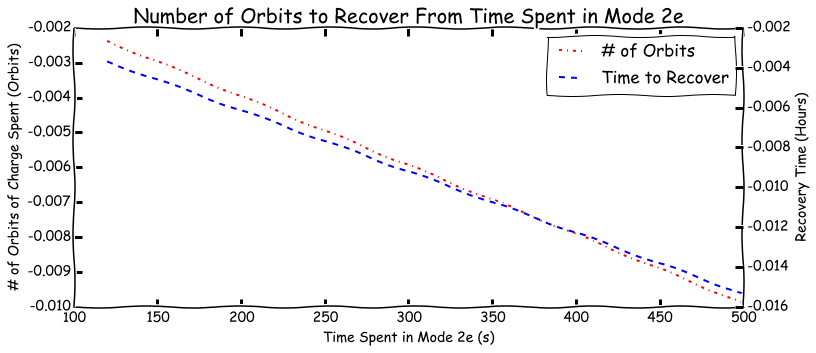

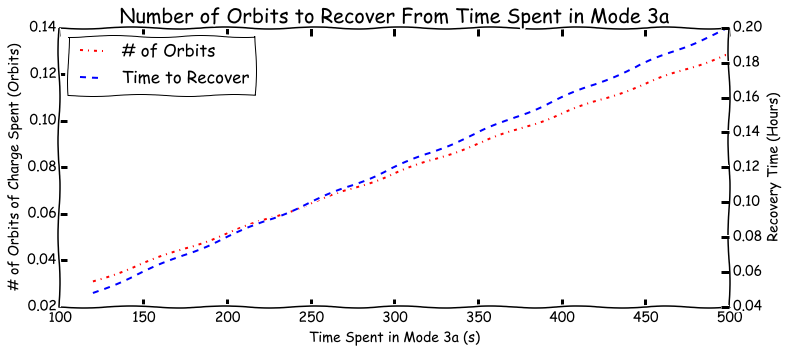

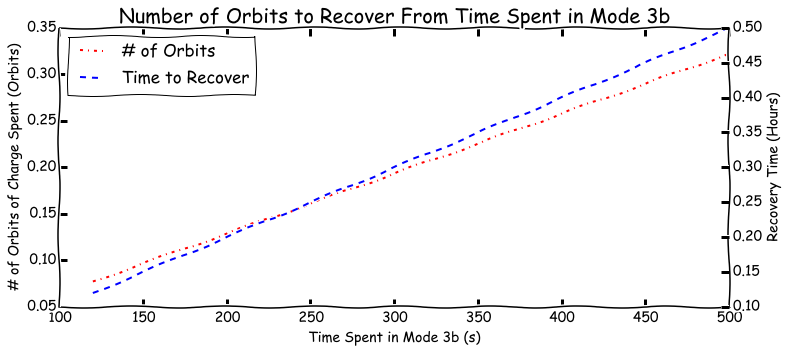

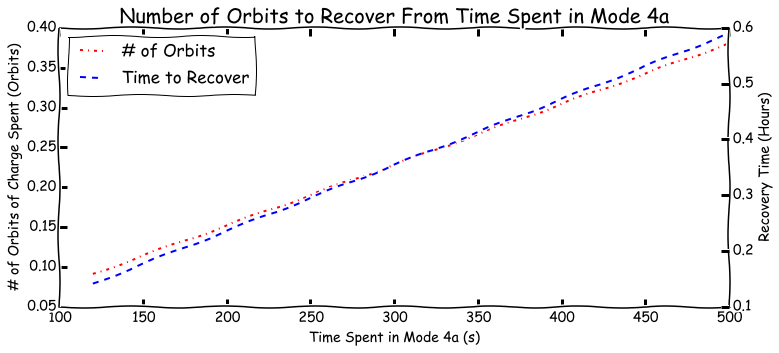

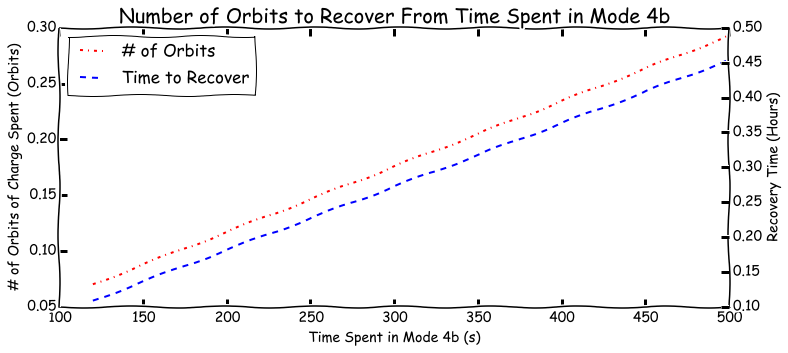

In [7]:
plt.xkcd()
for x in arange(0,12):
    plotTimes(modes[x], orbitsPerWh,orbitTimeAverage, timeLower = 120, timeUpper = 500)
for x in arange(0,12):
    rechargeTime(modes[x],orbitsPerWh,orbitTimeAverage,500)